In [28]:
# Spam mail prediction using Machine Learning.

In [29]:
# let’s import the libraries we are going to use

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [30]:
# Loading the dataset using pandas
df = pd.read_csv('mail_data.csv')

In [31]:
# Summarize the Dataset
print('df')
print('Head')
print(df.head())
print('Tail')
print(df.tail())
print('Shape:', df.shape)

df
Head
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
Tail
     Category                                            Message
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name
Shape: (5572, 2)


In [32]:
# It contains 2 columns and 5572 rows.
# The first column is the category (ham or spam) and the second column is the mail content.

# We see if there is missing data
print("Missing data")
print(df.isnull().sum())
# In percentage
print("Missing data in percentage")
print(round(df.isnull().sum()/df.shape[0]*100,2))

Missing data
Category    0
Message     0
dtype: int64
Missing data in percentage
Category    0.0
Message     0.0
dtype: float64


In [33]:
# There is no missing data

# Let's know the type of data
df.dtypes

Category    object
Message     object
dtype: object

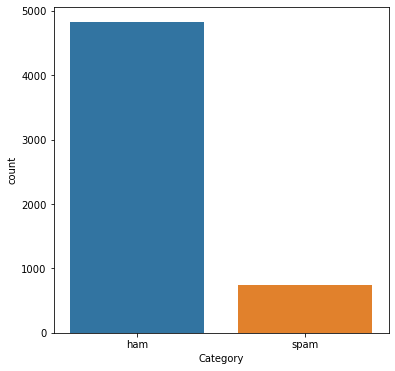

In [34]:
# Category column content 
plt.figure(figsize=(6,6))
sns.countplot(x='Category', data=df)
plt.savefig('Category_Content.jpg')
plt.show()

In [35]:
# That's unbalanced!
# Let's transform the category column into numerical column (ham --> 0 ; spam --> 1) 
df.loc[df['Category'] == 'ham', 'Category',] = 0
df.loc[df['Category'] == 'spam', 'Category',] = 1

In [36]:
# Working with unbalanced data
# Under-sampling

# Let's divide the data into legit and fraud
ham = df[df.Category == 0]
spam = df[df.Category == 1]

In [37]:
print('Ham shape: ', ham.shape)
print('Spam shape: ', spam.shape)

Ham shape:  (4825, 2)
Spam shape:  (747, 2)


In [38]:
# There are 492 fraud data
# Let's build a sample dataset with equal distribution of legit transactions and fraudulent transactions and concatening
# these into new dataset

ham_sample = ham.sample(n=spam.shape[0])
df_US = pd.concat([ham_sample, spam], axis=0) # (US: UnderSampling)

In [39]:
# Separating the data

X = df_US['Message']
Y = df_US['Category']

In [40]:
# Split out df_US into traina nd test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [41]:
# Transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [42]:
# Logistic Regression and metrics
Logistic = LogisticRegression()
Logistic.fit(X_train_features, Y_train)
Y_pred = Logistic.predict(X_test_features)
print('Logistic Regression:')
print('Train set', round(Logistic.score(X_train_features, Y_train), 4))
print('Test set', round(Logistic.score(X_test_features, Y_test), 4))

Logistic Regression:
Train set 0.9841
Test set 0.9398


In [43]:
# Metrics
matrix = confusion_matrix(Y_test, Y_pred) 
print('Confusion Matrix:') # Confusion Matrix [TN FP] ; [FN, TP]
print(matrix)

accuracy = accuracy_score(Y_test, Y_pred) # Accuracy: TN+TP / TN+TP+FN+FP
print('Accuracy:', round(accuracy, 4))

precision = precision_score(Y_test, Y_pred) # Precision: TP / TP+FP
print('Precision:', round(precision,4))

recall = recall_score(Y_test, Y_pred) # Recall: TP / TP+FN
print('Recall:', round(recall, 4))

f1 = f1_score(Y_test, Y_pred) # F1 Score (precision+recall): 2TP / 2TP+FN+FP
print('F1 Score:', round(f1, 4))

classificationRep = classification_report(Y_test, Y_pred) # Classification Report
print('Classification Report:')
print(classificationRep)

Confusion Matrix:
[[148   2]
 [ 16 133]]
Accuracy: 0.9398
Precision: 0.9852
Recall: 0.8926
F1 Score: 0.9366
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       150
           1       0.99      0.89      0.94       149

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299

